          Size     Rooms          Price
0  2029.215704  2.815409  252565.849172
1  1620.047163  2.880310  206606.367214
2  1793.621395  3.549830  244128.430936
3  2172.267960  3.327632  277444.987881
4  2060.267397  3.320066  244981.486724
              Size       Rooms          Price
count   200.000000  200.000000     200.000000
mean   1521.273148    2.935993  206921.824332
std     307.195782    0.472813   31985.500907
min     734.103055    1.613704  137749.411639
25%    1288.255007    2.654950  180614.310435
50%    1516.249563    2.926596  204691.900021
75%    1742.315501    3.267370  231959.566004
max    2214.943432    4.151958  277857.912412
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Size    200 non-null    float64
 1   Rooms   200 non-null    float64
 2   Price   200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None
Size     0
R

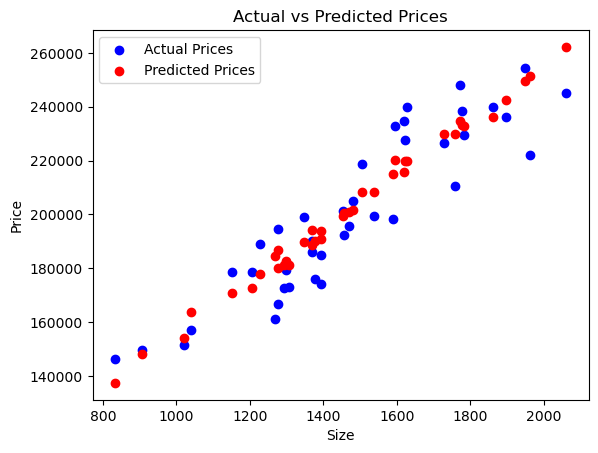

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
n_samples = 200
size = np.random.normal(1500, 300, n_samples)
rooms = np.random.normal(3, 0.5, n_samples)
price = 50000 + 100 * size + 2000 * rooms + np.random.normal(0, 10000, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Size': size,
    'Rooms': rooms,
    'Price': price
})

# Explore the data
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

# Split the data into training and testing sets
X = df[['Size', 'Rooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.scatter(X_test['Size'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['Size'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
